<div class="span5 alert alert-info">

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the `Springboard` workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [167]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("darkgrid")
sns.set_context("notebook")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$  is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [168]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [169]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [170]:
boston.keys()

dict_keys(['feature_names', 'data', 'DESCR', 'target'])

In [171]:
boston.data.shape

(506, 13)

In [172]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [173]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [174]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [175]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [176]:
print(boston.target.shape)

(506,)


In [177]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [178]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [179]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


>**First impressions:**
- Education `PTRATIO` should have an high impact on house prices. Education and LSTAT might be linear dependent of each other based on our real life experiences
- `CRIM` Crime rates must be checked 
- `LSTAT` either a result of Pricey houses or might be a factor in high-low prices. A lower LTSAT indicates people with higher incomes in the neighborhood as compared to others. 
- `RM`  how big the residence is an important factor in pricing. The prices increase with increase in the average number of rooms among homes in the neighborhood. 
- `AGE` Aged houses should be cheaper if not invested and renovated
- `RAD` distance from main stream highways can be a significant factor in house prices
- `DIS` weighted distances to five Boston employment centres, this worth checking as well

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

**PRICE - CRIME - EDUCATION QUALITY**

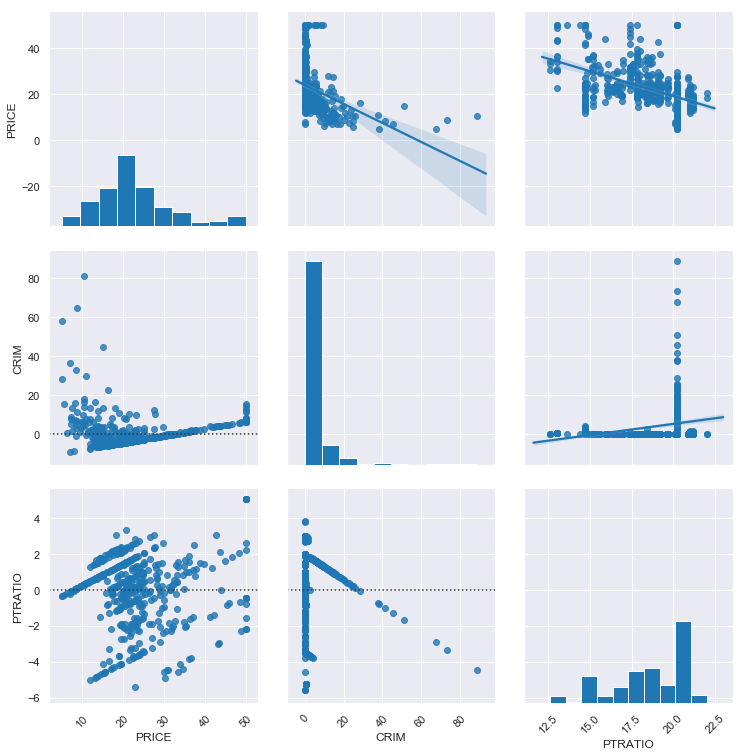

In [180]:
g = sns.PairGrid(bos[['PRICE','CRIM', 'PTRATIO']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>** Conclusion 1: **
House Prices and `Education quality` show a good linearity. The depencdency between those two was expected.

**PRICE - INCOME LEVEL - CRIME **

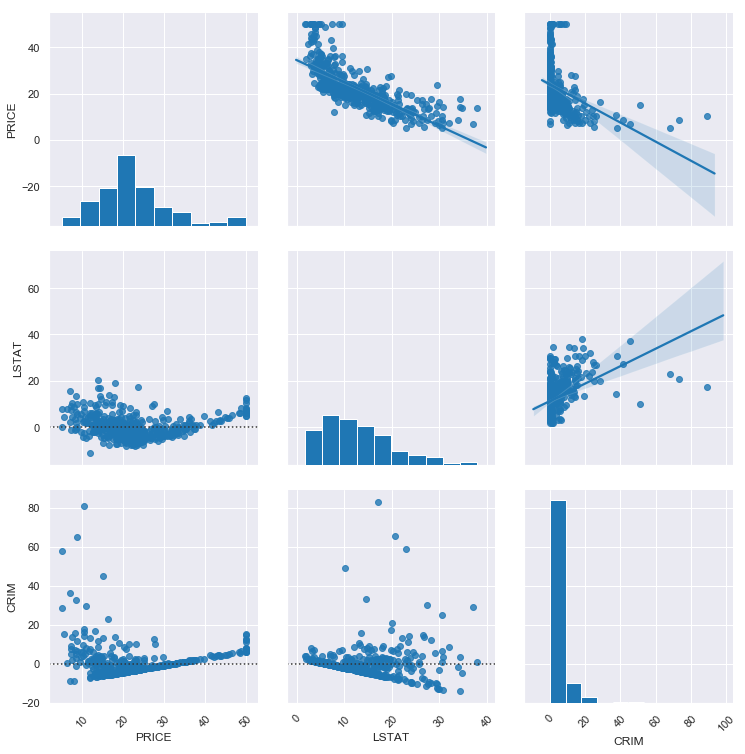

In [181]:
# PRICE - LSTAT - CRIME
g = sns.PairGrid(bos[['PRICE','LSTAT', 'CRIM']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>** Conclusion 2: **
Interesting, House Prices do not look like linearly dependent to Crime (per capita in town). Relationship between `LSTAT` and `PRICE` looks like a polynomial of degree 2 or more perhaps. We could try checking polynomial fit `POLYFIT` for this independent variable.

**PRICE - SIZE of RESIDENCE - INCOME LEVEL**

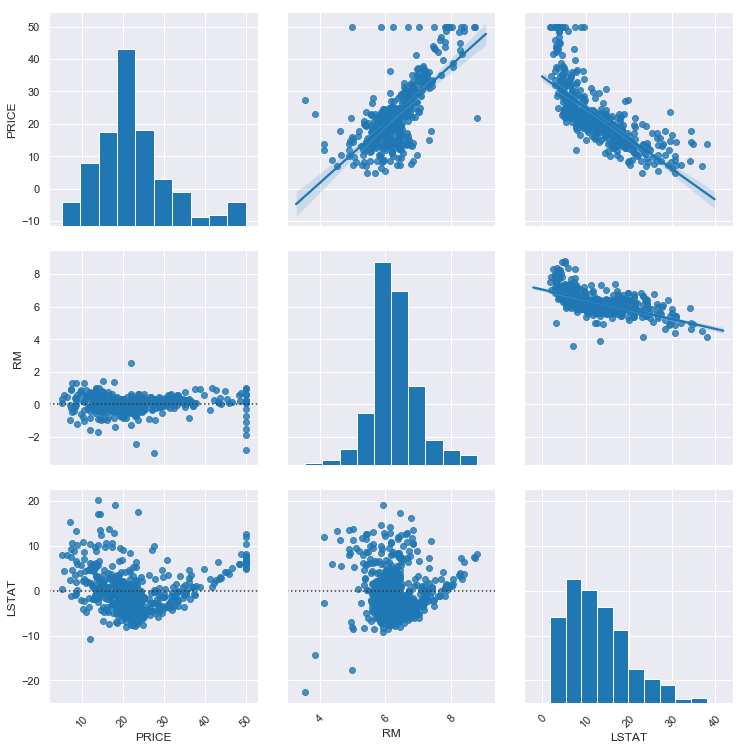

In [231]:
# PRICE - RM - LSTAT
g = sns.PairGrid(bos[['PRICE','RM', 'LSTAT']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 3:**
Definitely, `LSTAT` and `RM` are important factors. Pay attention to relationship between RM and LSTAT is shown in the middle-right scatter plot. This might cause a `Collinearity` between them. It really makes sense with the lower budgets you would get smaller sized dwelling. This relationship might be non-linear though based on the scatter plot

**PRICE - AGING EFFECT - DISTANCE to HIGHWAYS**

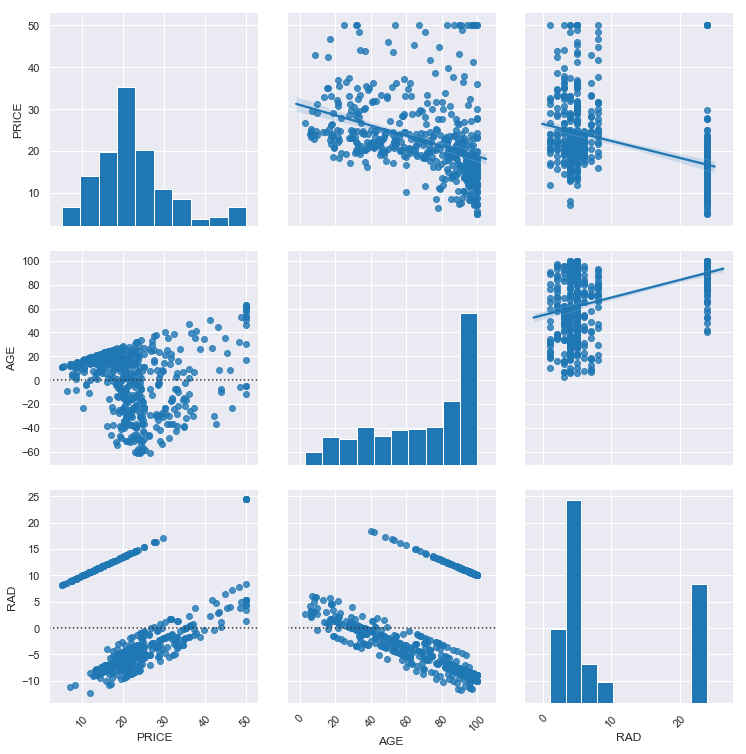

In [232]:
# PRICE - AGE - RAD
g = sns.PairGrid(bos[['PRICE','AGE', 'RAD']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 4**  Younger the residence, higher gets the prices ??? A statistical test might help us understanding the underlying relationship between AGE factor and PRICE. `Hypothesis Test` for AGE as a factor of House Prices would be reasonable here. 

>RAD vs PRICE shows no linearity and variation is too much. If we look at RAD index 5 where many observations fall into, we see that hosuing prices are vary from 0 all the way up to 50K. 

**PRICE - AGING - DISTANCE to WORK**

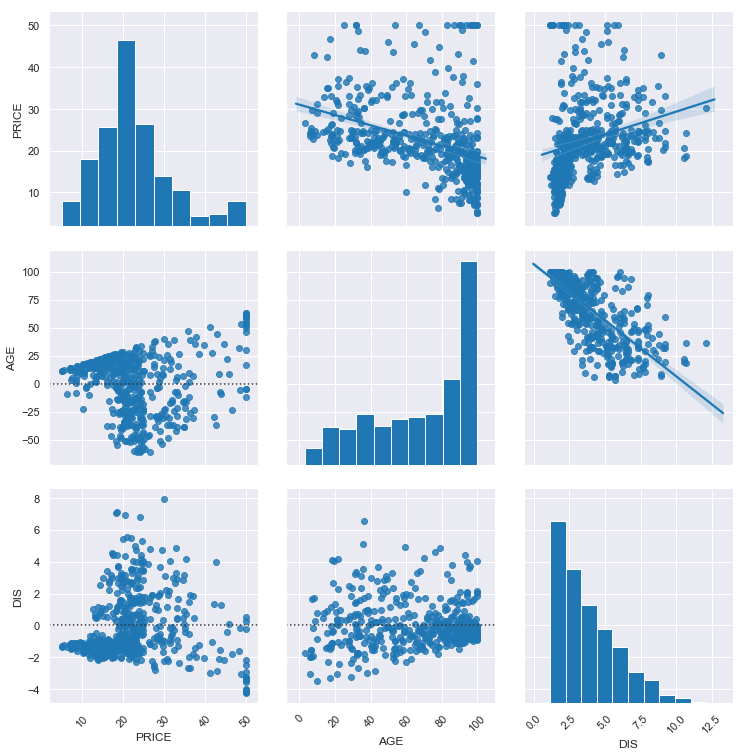

In [233]:
# PRICE - AGE - DIS
g = sns.PairGrid(bos[['PRICE','AGE', 'DIS']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 5** As seen above, DIS and AGE shows linear dependence to each other. We should not be taking both at once in the Linear Regression model as it shows collinearity condition. 

**PRICE - AGING - CRIMES**

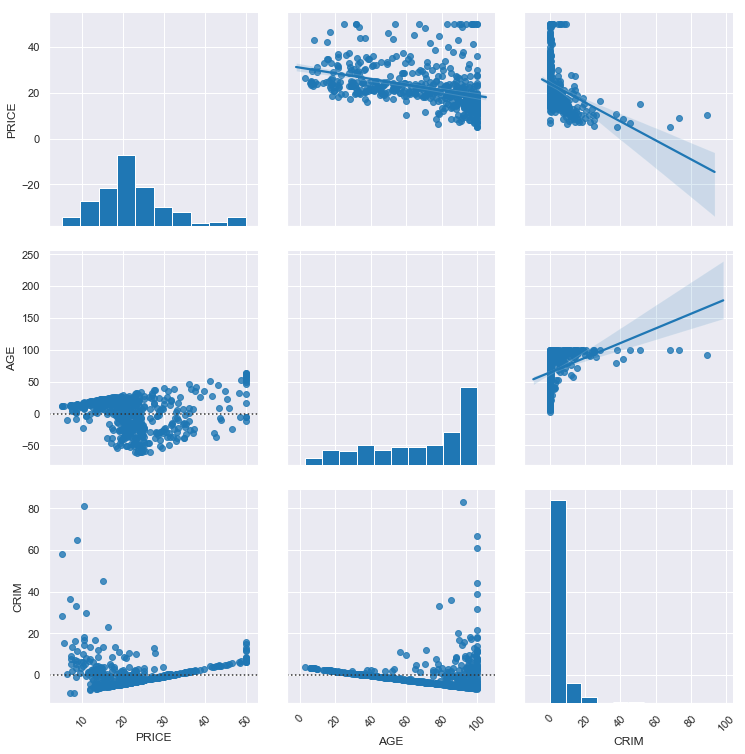

In [185]:
# PRICE - AGE - CRIME
g = sns.PairGrid(bos[['PRICE','AGE', 'CRIM']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

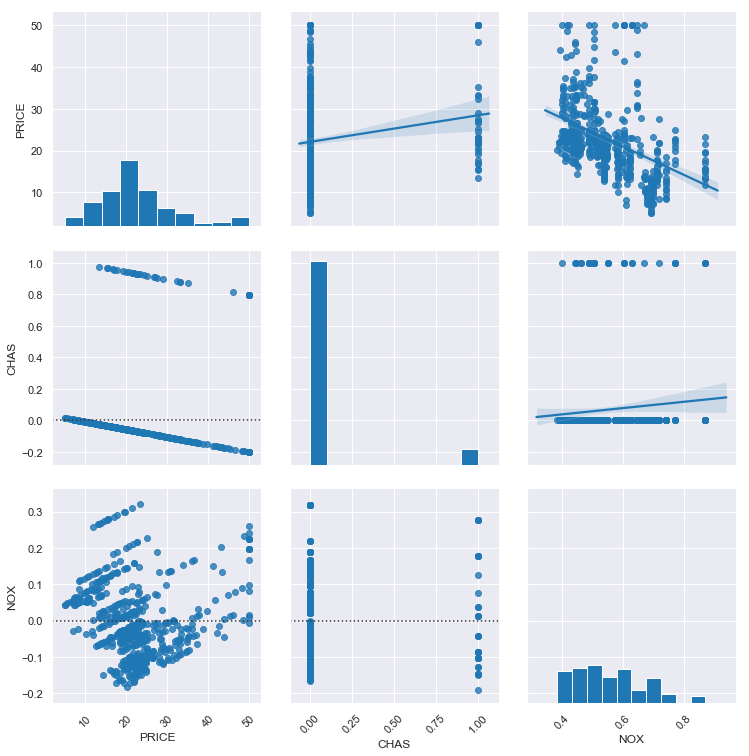

In [186]:
# PRICE - CHAS - NOX
g = sns.PairGrid(bos[['PRICE','CHAS', 'NOX']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

**Summary**

> - Increase in `RM` will lead to an increase in PRICE
> - Increase in `LSTAT` will lead to a decrease in PRICE
> - `RM` and `LSTAT` may be dependent of one another! We should pay attention to this. We could check for *VIF- Variance Inflation Factor* (if not Correlation Matrix)
> - Residual plot of RM and PRICE is not as it is supposed to be, ideally 
> - `PTRATIO` Lower the studentt teacher ratio, higher the quality of education and therefore, the neighborhood would be more sought after and have a higher price.
> - For now the features `RM` , `LSTAT` and `PTRATIO` are essential and also we should apply statistical test to see if `AGE` is a factor in house pricing in Boston. But before the statistical test first look at the correlation matrix if those two are correlated.
> I could have used [variance reduction](https://statweb.stanford.edu/~owen/mc/Ch-var-basic.pdf) on some variables to improve the correlation of independents variable with dependent variable. It is out of the scope of this study so we leave them as they are.

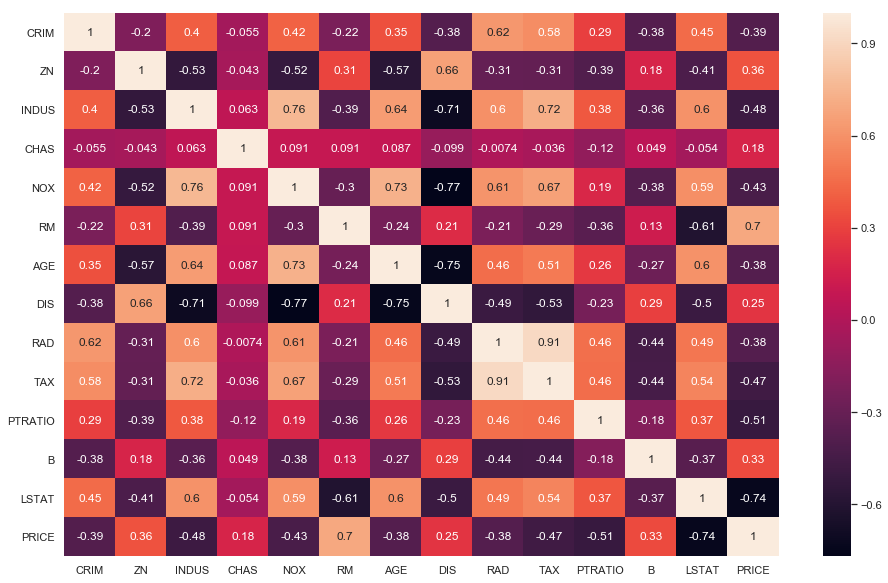

In [187]:
fig, ax = plt.subplots(figsize=(16,10))
correlation_matrix = bos.corr()
ax = sns.heatmap(data=correlation_matrix, cbar=True, annot=True)

> To fit a linear regression model, we select those features which have a high correlation with our target variable `PPRICE`. By looking at the correlation matrix we can see that `RM` has a strong positive correlation with `PRICE` (0.7) where as `LSTAT` has a high negative correlation with `PRICE`(-0.74).
    
> An important point in selecting features for a linear regression model is to check for multicolinearity. The features `RAD`, `TAX` have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features `DIS` and `AGE` which have a correlation of -0.75. 

> In addition to those three values that correlated with the response variable, I would like to check if there is a linear relation between CHARLES RIVER and PRICE. According to correlation matrix the linearity between them not significant.. I will use Two-Way ANOVA test to verify the result or understand better.

> Two Way Anova: In a Two-Way ANOVA, there are two variables to consider. The question is whether our variable in question is related to the two other variables. the analysis with two-way ANOVAs has a new element. We can look not only if each of the factors is significant; we can also check if the interaction of the factors has a significant influence on the distribution of the data.

> **Null Hypothesis:**There is not a linear relationship between the TWO 

> **Alternative Hypothesis:** There is ! 

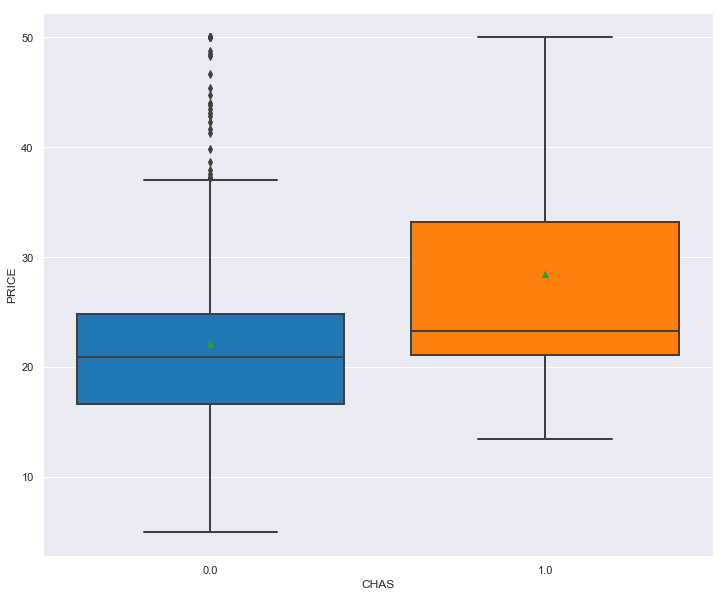

In [188]:
# Check the variation within the group (0 and 1) and variation of their means compare to 
# other
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x='CHAS', y='PRICE', data=bos, showmeans=True, linewidth=2, saturation=1.0)

In [241]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [243]:
# Least Squares Fit
formula = 'PRICE ~ C(CHAS) + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT '
model = smf.ols(formula, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          6.95e-135
Time:                        17:11:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.4911      5.104      7.149      0.000      26.462      46.520
C(CHAS)[T.1.0]     1.3443      0.431      3.120      0.002       0.498       2.191
CRIM              -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN                 0.0464      0.014      3.380      0.001       0.019       0.073
INDUS              0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS               1.3443      0.431      3.120      0.002       0.498       2.191
NOX              -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM                 3.8048      0.418      9.102      0.000       2.983       4.626
AGE                0.0008      0.013      0.057      0.955      -0.025       0.027
DIS               -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD                0.3057      0.066      4.608      0.000       0.175       0.436
TAX               -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO           -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B                  0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT             -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     2.61e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [190]:
# Two Way Anova 
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(CHAS),1312.079271,1.0,15.971512,0.000074
Residual,41404.216144,504.0,NaN,NaN


RSS: Residual Sum of Squares ${\sum(y_i- f(x_i))^2}$

SS: Sum of Squares ${\sum(x_i- \bar{x})^2}$

In [191]:
# r_squared = 1- RSS / TSS ---- Residual Sum of Squares / Total Sum of Squares
r_squared = 1 - aov_table.iloc[1,0]/(aov_table.iloc[0,0] + aov_table.iloc[1,0])
print('R^2 from Two Way Anova Table: ', r_squared, ' mathces with the R^2 in OLS ')

R^2 from Two Way Anova Table:  0.030716129708774687  mathces with the R^2 in OLS 


> Results:
>
> `F- Statistic` is statistically significant according to the above results. So we have strong evidence to Reject Null Hypothesis and the variable CHAS should be selected for
the final Linear Regression Model. 
> 
> Morever, `R^2` of 31 % means that the current model accounts for 31 % of the variance in contributing to `PRICE`
>

In [192]:
# Feature Extraction with RFE
# Selected Features are marked True and 1 ones 
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# load data
X = bos.iloc[:,0:13].values
Y = bos.iloc[:,13].values
# feature extraction
model2 = LinearRegression()
rfe = RFE(model2)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: " , fit.support_)
print("Feature Ranking: ", fit.ranking_)
print("Feature Names: ", bos.iloc[:,0:13].columns)

Num Features:  6
Selected Features:  [False False False  True  True  True False  True False False  True False
  True]
Feature Ranking:  [3 5 4 1 1 1 8 1 2 6 1 7 1]
Feature Names:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


> Selected Features: `CHAS`, `NOX`, `RM`, `DIS`, `PTRATIO`, `LSTAT`

In [193]:
# # Feature Importance with Extra Trees Classifier
# from sklearn.ensemble import ExtraTreesClassifier
# # load data
# X = bos.iloc[:,0:13].values
# Y = bos.iloc[:,13].values
# # feature extraction
# model3 = ExtraTreesClassifier()
# model3.fit(X, Y)
# print(model3.feature_importances_)

# Question: Feature selection Criteria for Linear Regression??

https://onlinecourses.science.psu.edu/stat857/node/45/

In [194]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(4,4))
# # Crime vs Price
# _ = sns.regplot(x='CRIM', y='PRICE', data=bos, fit_reg=True, ax=ax[0])
# # Crime vs Pupil-To-Teacther PTRATIO
# _ = sns.regplot(x='CRIM', y='PTRATIO', data=bos, fit_reg=True, ax=ax[1])
# plt.show()

In [195]:
# # plt.scatter(bos.CRIM, bos.PRICE)
# fig, ax = plt.subplots(figsize=(6,6))
# ax = sns.regplot(x='CRIM', y='PRICE', data=bos, fit_reg=True)
# ax.set_xlabel("Per capita crime rate by town (CRIM)")
# ax.set_ylabel("Housing Price")
# ax.set_title("Relationship between CRIM and Price")
# #ax.legend(loc='upper right')
# #fig.tight_layout()

In [196]:
# # plt.scatter(bos.CRIM, bos.PRICE)
# fig, ax = plt.subplots(figsize=(6,6))
# ax = sns.regplot(x='CRIM', y='PTRATIO', data=bos, fit_reg=True)
# ax.set_xlabel("Per capita crime rate by town (CRIM)")
# ax.set_ylabel("Pupil-To-Teacher Ratio")
# ax.set_title("Relationship between CRIM and PTRATIO")
# #ax.legend(loc='upper right')
# #fig.tight_layout()

In [197]:
# fig, ax = plt.subplots(figsize=(6,6))
# ax = sns.regplot(x='PTRATIO', y='PRICE', data=bos, fit_reg=True)
# ax.set_xlabel("Pupil to Teacher Ratio")
# ax.set_ylabel("Housing Price")
# ax.set_title("Relationship between PTRATIO and Price")
# #ax.legend(loc='upper right')
# #fig.tight_layout()


In [198]:
# # AGE : proportion of owner-occupied units built prior to 1940
# fig, ax = plt.subplots(figsize=(6,6))
# ax = sns.regplot(x='AGE', y='PRICE', data=bos, fit_reg=True)
# ax.set_xlabel("Built prior to 1940")
# ax.set_ylabel("Housing Price")
# ax.set_title("Relationship between AGE and Price")
# #ax.legend(loc='upper right')
# #fig.tight_layout()

<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [199]:
# your turn: describe relationship


In [200]:
# your turn: scatter plot between *RM* and *PRICE*


In [201]:
# your turn: scatter plot between *PTRATIO* and *PRICE*


In [202]:
# your turn: create some other scatter plots


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

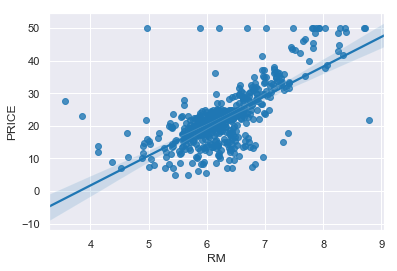

In [203]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


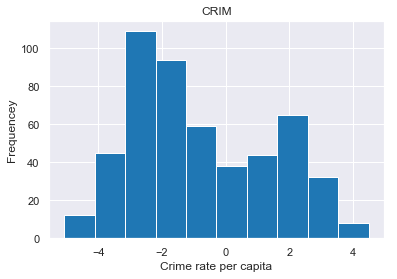

In [204]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

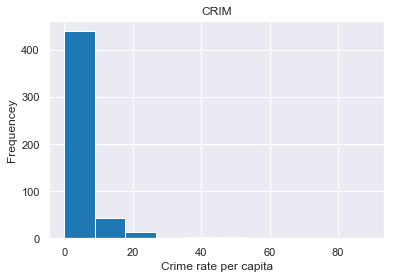

5.237578293084702

In [205]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()
# Compute the skewness of a data set
stats.skew(bos.CRIM, bias=False)

> - Measure of skewness of CRIME data:  5.222039072246122 .
> - For normally distributed data, the skewness should be about 0. 
> - The log transformation can help getting less skewed distribution if the original form of the data is highly skewed. As seen above the original CRIME per capita is right skewed.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [206]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [207]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        09:36:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [208]:
# Selected Features: `CHAS`, `NOX`, `RM`, `DIS`, `PTRATIO`, `LSTAT`
formula = 'PRICE ~ C(CHAS) +NOX + RM + DIS  + PTRATIO + LSTAT'
model4 = smf.ols(formula, data=bos).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 20 Nov 2018   Prob (F-statistic):          7.91e-133
Time:                        09:36:52   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.9226      4.559      8.099      0.000      27.965      45.880
C(CHAS)[T.1.0]     3.2443      0.883      3.673      0.000       1.509       4.980
NOX              -18.7404      3.227     -5.807      0.000     -25.081     -12.400
RM                 4.1118      0.407     10.097      0.000       3.312       4.912
DIS               -1.1446      0.167     -6.865      0.000      -1.472      -0.817
PTRATIO           -1.0027      0.113     -8.895      0.000      -1.224      -0.781
LSTAT             -0.5698      0.047    -12.010      0.000      -0.663      -0.477
==============================================================================
Omnibus:                      174.026   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.948
Skew:                           1.483   Prob(JB):                    1.29e-166
Kurtosis:                       8.238   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> This table of results comply with our expectations from variables. We see the effects what were expecting.

**Evaluation of Model 1**

**Outliers: **In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

**Leverage:** An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

**Influence:** An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

The following is reference from stackexchange.

We need to understand three things:

leverage,
standardized residuals, and
Cook's distance.

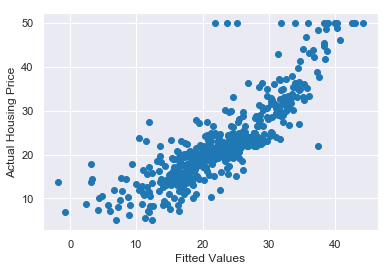

In [224]:
# Compare fitted values with the real ones
plt.scatter(model4.fittedvalues, bos.PRICE)
plt.ylabel('Actual Housing Price')
plt.xlabel('Fitted Values')
plt.show()

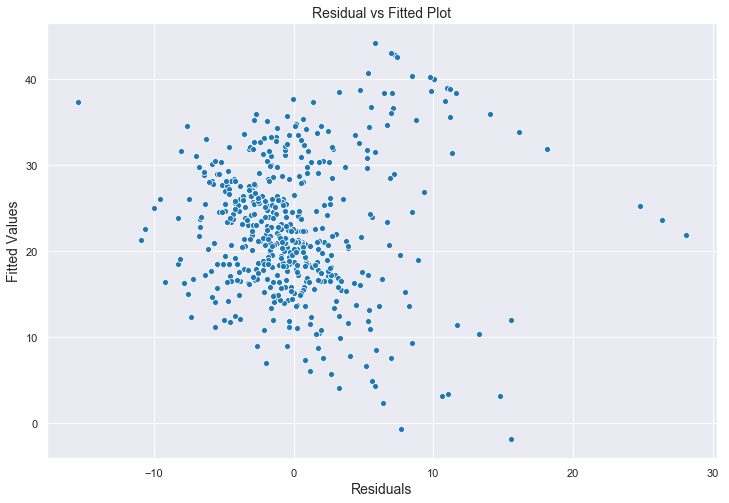

In [229]:
# Rediuals vs actual house prices
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(x=model4.resid, y=model4.fittedvalues, data=pd.concat([model4.resid, model4.fittedvalues], axis=1))
ax.set_xlabel('Residuals', fontsize=14)
ax.set_ylabel('Fitted Values', fontsize=14)
ax.set_title('Residual vs Fitted Plot', fontsize=14)
plt.show()

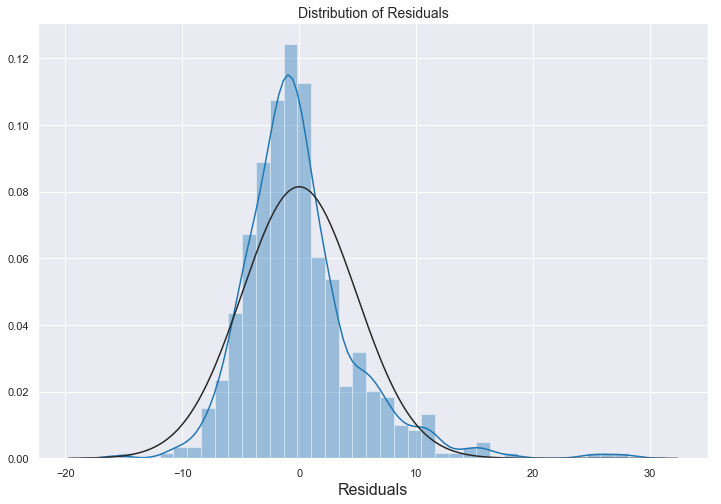

In [211]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.distplot(model4.resid, axlabel='Residuals', fit=norm)
ax.set_xlabel('Residuals', fontsize=16)
ax.set_title('Distribution of Residuals', fontsize=14)
plt.show()


Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the wls_prediction_std command

NameError: name 'y' is not defined

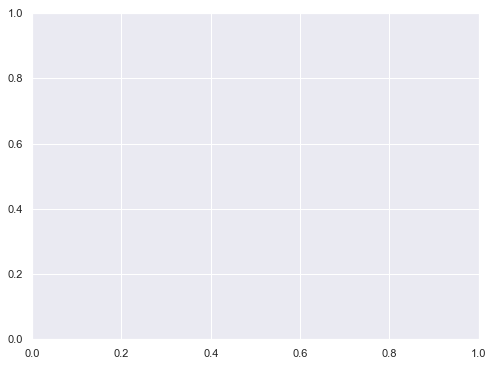

In [212]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(model4)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, model4.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');


#https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

**Normality of the Residuals**

Jarque-Bera Test:

In [213]:
import statsmodels.stats.api as sms

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model4.resid)
for i in zip(name, test):
    print(i)

('Jarque-Bera', 763.9483431097223)
('Chi^2 two-tail prob.', 1.2904021089303396e-166)
('Skew', 1.482742002136944)
('Kurtosis', 8.238378436253933)


Omni Test

In [214]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model4.resid)
for i in zip(name, test):
    print(i)

('Chi^2', 174.02619475466514)
('Two-tail probability', 1.6243961657888998e-38)


**Influence Test**

Once created, an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [215]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model4)
test_class.dfbetas[:5,:]

array([[-0.06514396,  0.03464981, -0.01899216,  0.03701452,  0.01931667,
         0.08106613,  0.06539701],
       [-0.01493339,  0.0088653 ,  0.0162175 ,  0.004181  ,  0.00280251,
         0.0075348 ,  0.00341061],
       [-0.01026141, -0.00915755, -0.00081722,  0.01904027, -0.00013897,
         0.00624846, -0.01193266],
       [-0.02467595, -0.00810999,  0.01602412,  0.01507789,  0.02370531,
         0.02604666, -0.02698107],
       [-0.07010931, -0.01445561,  0.02127406,  0.06542114,  0.05280265,
         0.04901718, -0.01004141]])

Useful information on leverage can also be plotted:

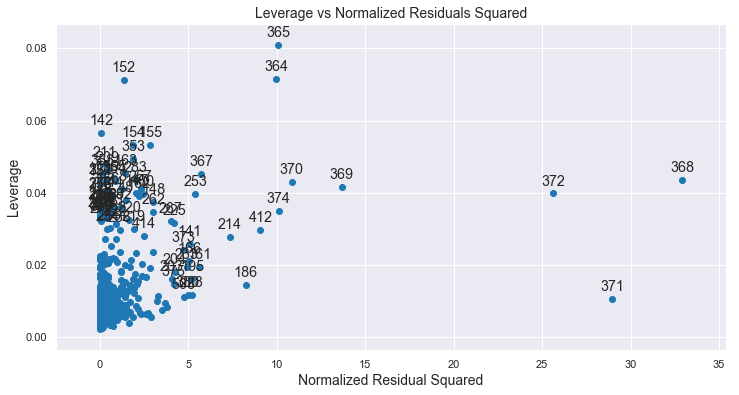

In [216]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(12,6))
fig = plot_leverage_resid2(model4, ax=ax)
ax.set_xlabel('Normalized Residual Squared',fontsize=14)
ax.set_ylabel('Leverage', fontsize=14)
ax.set_title('Leverage vs Normalized Residuals Squared', fontsize=14)
plt.show()

**Multicollinearity**

In [217]:
np.linalg.cond(model4.model.exog)

545.2043595649138

**Heteroskedasticity Tests**

Breush-Pagan Test

In [218]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(model4.resid, model4.model.exog)
for i in zip(name, test):
    print(i)

('Lagrange multiplier statistic', 36.80979564395447)
('p-value', 1.917780874805646e-06)
('f-value', 6.5247483343999475)
('f p-value', 1.207995575777598e-06)


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


Goldfeld-Quandt Test

In [219]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model4.resid, model4.model.exog)
for i in zip(name, test):
    print(i)

('F statistic', 2.2954117224869823)
('p-value', 6.836698244112574e-11)


**Linearity**

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [220]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(model4)
for i in zip(name, test):
    print(i)

LinAlgError: Singular matrix

### Fitting Linear Regression using `sklearn`


In [221]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
-|-
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [222]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [223]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---
### Regularization
Linear regression minimizes a loss function, estimating a coefficient for each predictor. Large coefficients can lead to overfitting, so regularization penalizes large coefficients.

#### Lasso Regularization
* Lasso penalizes the sum of absolute values of regression coefficients. It is calculated by adding the lasso function to the OLS loss function:

$$ \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 \;+\; \alpha \times \sum^{\rm P}_{\rm j=1}|b_j| $$

* Lasso shrinks the coeffecients of less important features to exactly $0$, so it is great for selecting important features (predictors), especially for datasets with a lot of variables.

#### Ridge Regression
* Ridge penalizes the sum of squares of the model coefficients. It is calculated by adding the ridge function to the OLS loss function:

$$ \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 \;+\; \alpha \times \sum^{\rm P}_{\rm j=1}b^2_j $$

* Ridge is particularly useful when there is multicolinearity amongst the predictor variables.

---
The $\alpha$ hyperparameter determines the strength of the penalty, and can be tuned via cross-validation. Since the addition of a reguarization function involves multiplying such by $\alpha$, an $\alpha$ of $0$ is the same as (overfitting) ordinary least squares. Conversely, very high $\alpha$ can lead to underfitting.

<br>
Since the coefficients are partially determined by the scale of the features, and all coefficients are summed together for regularized models, **the features must be standardized**. One way to do so is to remove the mean and scale to unit variance.

### Evaluating the Model

Three statistics commonly used in Ordinary Least Squares (OLS) regression to evaluate model fit are: the Coefficient of Determination ($R^2$), the $F$-Statistic, and the Root Mean Squared Error (RMSE). 

#### Coefficient of Determination

$R^2$ usually indicates how well the model fits the observed data. Intuitively, $0$ indicates that the proposed model does not improve prediction over the mean model and $1$ indicates perfect prediction. Improvement in the regression model results in proportional increases in $R^2$.

* Residual Sum of Squares (RSS) - measures the amount of error in the fitted model:
$$ \text{RSS} = \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 $$


* Explained Sum of Squares (ESS) - measures the variance explained by the regression model:
$$ \text{ESS} = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 $$


* Total Sum of Squares (TSS):
$$ \text{TSS} = \sum_{i=1}^N \left( {y}_i - \bar{y} \right)^2 $$


* Therefore:
$$ \text{TSS} = {\text{ESS}}+{\text{RSS}} $$


* **Coefficient of Determination**:
$$ R^2 = \frac{\text{ESS}}{\text{TSS}} $$


The threshold for an acceptable $R^2$ value depends on the domain (subject field), so it is most useful for comparing different models.

#### Adjusted $R^2$
One pitfall of $R^2$ is that it can only increase as predictors are added to the regression model. This increase is artificial when predictors are not improving the model’s fit. Adjusted $R^2$, takes into account the number of predictor variables and observations. Adjusted $R^2$ will decrease as predictors are added if the increase in model fit does not make up for the loss of degrees of freedom, and will increase as predictors are added if the increase in model fit is beneficial. Adjusted $R^2$ should be evaluated for models with more than one predictor variable.

$$ R_{adj}^2 = 1 - \frac{\left(\frac{RSS}{N-P-1}\right)}{\left(\frac{TSS}{N-1}\right)} $$

where:
* $P$ = the number of predictors


* $N$ = the number of observations


---
#### The $F$-Statistic

The $F$-test evaluates the null hypothesis that all regression coefficients are equal to zero versus the alternative that at least one is not. An equivalent null hypothesis is that $R^2$ equals zero. A significant $F$-test indicates that the observed $R^2$ is reliable, and is not a false result of oddities in the data. Thus, the $F$-test determines whether the proposed relationship between the response variable and the set of predictors is statistically reliable.

$$ F = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - P - 1}{P} \right) $$

The $p$-value can be checked with statistical software by providing the $F$-Statistic and degrees of freedom values. If the $F$-distribution provides a $p$-value that is lower than some threshold, reject the null hypothesis.

---
#### Mean Squared Error

MSE represents the difference between the observations and the predicted values. It is used to determine the extent to which the model fits the data as well as the impact of removing predictors. It is always non-negative, and values closer to zero are better.

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 $$

#### Root Mean Squared Error
Whereas $R^2$ is a relative measure of fit, RMSE is an absolute measure of fit, and has the useful property of being in the same units as the response variable. Lower values indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.

$$ \text{RMSE} = \sqrt{\text{MSE}} $$

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [ ]:
# your turn


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [ ]:
# your turn


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [ ]:
# your turn


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# your turn

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


---
## MODEL EVALUATIONS
<a href='#compare'>Compare Models and Select Best</a> | <a href='#assumptions'>Evaluate Assumptions for Selected Model</a> | <a href='#troubleshoot'>Troubleshoot Assumption Violations</a> | <a href='#revised'>Revised/Final Model(s)</a>
<br><br>

#### AIC and BIC
The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are based on the log-likelihood. Both measures introduce a penalty for model complexity, but the AIC penalizes complexity less severely than the BIC.

 $$ \begin{equation*} AIC = 2 K - 2\ln( \mathcal{L} ) \end{equation*} $$  
 
<br>
 $$ \begin{equation*} BIC = K \ln(N) - 2\ln( \mathcal{L} ) \end{equation*} $$  

where, $N$ is the number of observations, $K$ is the number of parameters, and $\mathcal{L}$ is the log-likelihood. Both measures are useful only for comparing models with favorability given to the model that has the lower AIC or BIC value.

#### The $F$-Test for Nested Models 

The  $F$-Statistic can also be used to compare two models trained on the same dataset where one of the models contains a subset of the variables in the other model. The full model contains $P$  predictors and the nested model contains a subset of these $P$  predictors. The model with more variables will always be able to fit the data at least as well as the model with fewer variables. But one often wants to determine whether the full model gives a significantly better fit to the data.


$$ F={\frac  {\left({\frac  {{\text{RSS}}_{Nested}-{\text{RSS}}_{Full}}{P_{Full}-P_{Nested}}}\right)}{\left({\frac  {{\text{RSS}}_{Full}}{N - P_{Full} - 1}}\right)}} $$


The null hypothesis that the full model does not provide a significantly better fit than the nested model is rejected if the $F$-Statistic from the data is greater than the critical value of the $F$-distribution for some desired false-rejection probability (e.g., 0.05).



<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [ ]:
# Your turn.


## Evaluate Model Assumptions

Most statistical tests depend upon assumptions about the variables. To draw conclusions about estimates for a linear regression model, four assumptions are made about the behavior of the data:


* The relationship between the response and predictor variables are **LINEAR** in nature.


* The errors are **INDEPENDENT**.


* The errors have **NORMAL** distributions.


* The errors have **EQUAL** variances.


(This follows a handy mnemonic:
L
I
N
E)

---
#### LINEAR
*  If the relationship between the response and predictor variables are not linear, the results of the regression analysis will under-estimate the true relationship. This is best checked with a **scatter plot of the predicted values vs. the observed values**.

#### INDEPENDENT
* A **lag plot of the residuals** checks whether they are random. If random, data should not exhibit any identifiable structure in a lag plot.

#### NORMAL
* If the error distribution is significantly non-normal, prediction intervals will not be reliable. The best test for normally distributed errors is a **normal probability plot of the residuals**. If the distribution is normal, the points on such a plot should fall close to the diagonal reference line.


* Violations of normality often arise either because the distributions of variables are significantly non-normal, and/or the linearity assumption is violated. In such cases, a **nonlinear transformation of variables** might solve both problems. If the distributions of some of the variables are extremely asymmetric or long-tailed, they may not fit into a linear model with normally distributed errors.


* Since real data rarely has errors that are perfectly normally distributed, and since a significant violation of the normal distribution assumption may indicate another problem with model assumptions and/or the presence of influential data points, it is usually helpful to focus more on any violations of the other assumptions and/or the influence of a few outliers (which may be mainly responsible for violations of normality anyway). An effective way to detect significant outliers is with **influence plots using measurements such as leverage and Cook's Distance**.

#### EQUAL
* If the variance of errors is markedly different at various values, this can lead to distortion of findings and weaken the analysis. This assumption can be checked by examining a **residual plot of the predicted values vs. the standardized residuals**. Ideally, residuals are randomly scattered around $0$, providing a relatively even distribution. The vertical width of the scatter shouldn't appear to increase or decrease across the fitted values.

---
If assumptions are violated (they usually are), $R^2$ and $p$-values are less reliable.
